In [3]:
import pandas as pd
import numpy as np

# 1. Archivos
## 1.1 Lee datos
Lee un Dataframe sin especificar el indice

In [4]:
casts = pd.read_csv('./data/cast.csv', index_col=None)
titles =pd.read_csv('./data/titles.csv', index_col =None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [6]:
casts.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

Vemos que se crea un indice por defecto

In [7]:
casts.index

RangeIndex(start=0, stop=75001, step=1)

In [8]:
casts.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

Por defecto cuando escribimos un DataFrame nos muestra las 5 primeras y 5 ultimas filas. Podemos cambiar este valor por defecto con `set_options`

In [9]:
titles

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
...,...,...
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984


In [10]:
pd.set_option('max_rows', 4, 'max_columns', 10)
titles

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
...,...,...
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


Numero de filas de un Dataframe

In [11]:
len(titles)

50000

In [12]:
ex2=pd.read_csv('./data/ex2.csv', header=None)
ex2

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
ex2=pd.read_csv('./data/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])
ex2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [14]:
ex2=pd.read_csv('./data/ex2.csv', names=['a', 'b', 'c', 'd', 'message'], index_col='message')
ex2

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


## 1.2 Escribe datos

In [15]:
ex2.to_csv('d_out2.csv', header=False, index=False)

In [16]:
ex2.to_csv('d_out21.csv', header=True, index=False)

In [17]:
ex2.to_csv('d_out22.csv', header=True, index=True)

# 2. Operaciones
## 2.1 Selecciona elementos

Obtiene un Series con la columna title

In [18]:
t = titles['title']
type(t)

pandas.core.series.Series

In [19]:
t.head()

0             The Rising Son
1    The Thousand Plane Raid
              ...           
3                    Country
4                 Gaiking II
Name: title, Length: 5, dtype: object

Accede a un valor por posicion. Aqui accedemos a la cuarta posicion

In [20]:
titles.iloc[3]

title    Country
year        2000
Name: 3, dtype: object

In [21]:
titles.iloc[3:5]

,title,year
3,Country,2000
4,Gaiking II,2011


Podemos usar el indice para acceder a una posicion

In [22]:
titles.loc[3]

title    Country
year        2000
Name: 3, dtype: object

Creamos un indice. Ahora la cuarta fila se corresponde con el valor del indice 4:

In [23]:
titles.index=np.arange(len(titles))+1
titles.loc[4]

title    Country
year        2000
Name: 4, dtype: object

In [24]:
titles.iloc[2:5,:]

,title,year
3,Crucea de piatra,1993
4,Country,2000
5,Gaiking II,2011


In [25]:
titles.loc[2:5,:]

,title,year
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000
5,Gaiking II,2011


Seleccionamos unas posiciones "sueltas"

In [26]:
titles.loc[[2,4,6],:]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [27]:
titles.iloc[[2,4,6],:]

,title,year
3,Crucea de piatra,1993
5,Gaiking II,2011
7,The Fresh Air Will Do You Good,2008


Podemos utilizar las columnas como hemos usado el indice. Es decir, podemos seleccionar una columna concreta, un rango de columnas, o una lista de columnas

In [28]:
titles.loc[[2,4,6],'title']

2    The Thousand Plane Raid
4                    Country
6                Medusa (IV)
Name: title, dtype: object

In [29]:
titles.iloc[[1,3,5],0]

2    The Thousand Plane Raid
4                    Country
6                Medusa (IV)
Name: title, dtype: object

In [30]:
titles.loc[[2,4,6],'title':'year']

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [31]:
titles.iloc[[1,3,5],0:1]

,title
2,The Thousand Plane Raid
4,Country
6,Medusa (IV)


In [32]:
titles.loc[[2,4,6],['title','year']]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [33]:
titles.iloc[[1,3,5],[0,1]]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


Podemos hacer lo mismo con una Serie

In [34]:
t.iloc[3]

'Country'

In [35]:
t.loc[4:5]

4     Gaiking II
5    Medusa (IV)
Name: title, dtype: object

## 2.2 Selecciona una posicion

In [36]:
titles.at[3,'title']

'Crucea de piatra'

In [37]:
titles.iat[2,0]

'Crucea de piatra'

## 2.3 Filtra Datos

In [38]:
after85 = titles[titles['year'] > 1985]
after85.head()

,title,year
1,The Rising Son,1990
3,Crucea de piatra,1993
...,...,...
5,Gaiking II,2011
6,Medusa (IV),2015


Podemos usar and y or: 

In [39]:
t = titles
movies90 = t[ (t['year']>=1990) & (t['year']<2000) ]
movies90.head()

,title,year
1,The Rising Son,1990
3,Crucea de piatra,1993
...,...,...
20,Maa Durga Shakti,1999
25,Conflict of Interest,1993


## 2.4 Ordenar

In [40]:
macbeth = t[ t['title'] == 'Macbeth']
macbeth.head()

,title,year
4227,Macbeth,1913
9323,Macbeth,2006
...,...,...
17167,Macbeth,1997
25848,Macbeth,1998


Ordenamos por indice

In [41]:
macbeth = t[ t['title'] == 'Macbeth'].sort_index()
macbeth.head()

,title,year
4227,Macbeth,1913
9323,Macbeth,2006
...,...,...
17167,Macbeth,1997
25848,Macbeth,1998


Ordenamos por valor. En este caso por la serie `year`

In [42]:
macbeth = t[ t['title'] == 'Macbeth'].sort_values('year')
macbeth.head()

,title,year
4227,Macbeth,1913
17167,Macbeth,1997
...,...,...
9323,Macbeth,2006
11723,Macbeth,2013


## 2.5 Null Values

In [43]:
c = casts
c['n'].isnull().head()

0    False
1    False
     ...  
3     True
4     True
Name: n, Length: 5, dtype: bool

In [44]:
c.isnull().head()

,title,year,name,type,character,n
0,False,False,False,False,False,False
1,False,False,False,False,False,False
...,...,...,...,...,...,...
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [45]:
c['n'].notnull().head()

0     True
1     True
     ...  
3    False
4    False
Name: n, Length: 5, dtype: bool

In [46]:
c.notnull().head()

,title,year,name,type,character,n
0,True,True,True,True,True,True
1,True,True,True,True,True,True
...,...,...,...,...,...,...
3,True,True,True,True,True,False
4,True,True,True,True,True,False


In [47]:
c[c['n'].isnull()].head(3)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [48]:
c[c['n'].notnull()].head(3)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [49]:
c_fill = c[c['n'].isnull()].fillna('NA')
c_fill.head(2)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA


## 2.6 Operaciones con String

In [50]:
t[t['title'].str.startswith("Maa ")].head(3)

,title,year
20,Maa Durga Shakti,1999
3047,Maa Aur Mamta,1970
7471,Maa Vaibhav Laxmi,1989


## 2.7 Contar elementos

In [51]:
t['year'].value_counts().head()

2016    2363
2017    2138
        ... 
2014    1701
2013    1609
Name: year, Length: 5, dtype: int64

## 2.8 Graficas

In [52]:
import matplotlib.pyplot as plt

Mostramos los graficos inline

In [53]:
%matplotlib inline

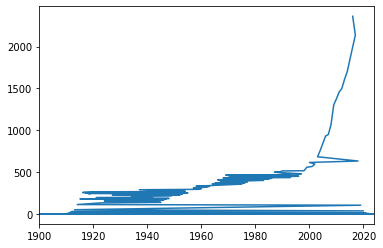

In [54]:
t = titles
p = t['year'].value_counts()
p.plot()
#plt.show()

Ordena por indice

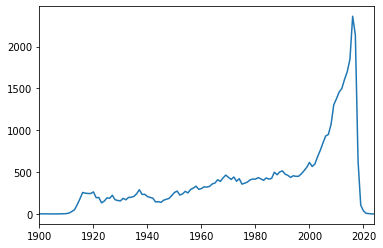

In [55]:
p.sort_index().plot()

## 2.9 Eliminar duplicados

In [56]:
dforiginal = pd.DataFrame({'k1':['one']*3 + ['two']*4,
... 'k2':[1,1,2,3,3,4,4]})
df=dforiginal.copy()
df

,k1,k2
0,one,1
1,one,1
...,...,...
5,two,4
6,two,4


In [57]:
df.duplicated()

0    False
1     True
     ...  
5    False
6     True
Length: 7, dtype: bool

In [58]:
df[df.duplicated()]

,k1,k2
1,one,1
4,two,3
6,two,4


Borra los duplicados, sobre el propio DataStream

In [59]:
df.drop_duplicates(inplace=True)
df.duplicated()
df

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


Borra los duplicados, pero eligiendo conservar la ultima instancia encontrada. Fijarse en los indices

In [60]:
df=dforiginal.copy()
df.drop_duplicates(keep="last",inplace=True)
df

,k1,k2
1,one,1
2,one,2
4,two,3
6,two,4


## 2.10 Buscar y reemplazar

In [61]:
df=dforiginal.copy()
df

,k1,k2
0,one,1
1,one,1
...,...,...
5,two,4
6,two,4


In [62]:
df.replace('one', 'One',inplace=True)
df

,k1,k2
0,One,1
1,One,1
...,...,...
5,two,4
6,two,4


Reemplaza varios a la vez

In [63]:
df.replace({'two':'Two', 1:10},inplace=True)
df

,k1,k2
0,One,10
1,One,10
...,...,...
5,Two,4
6,Two,4


## 2.11 Aplicar un lambda

In [245]:
def num_missing(x):
  return sum(x.isnull())

In [246]:
df.apply(num_missing, axis=0).head()

AA      0
GE      0
IBM     0
MSFT    0
dtype: int64

In [247]:
df.apply(num_missing, axis=1).head()

date
1990-01-02    0
1990-02-02    0
             ..
1990-06-02    0
1990-07-02    0
Length: 5, dtype: int64

# 3. Group By

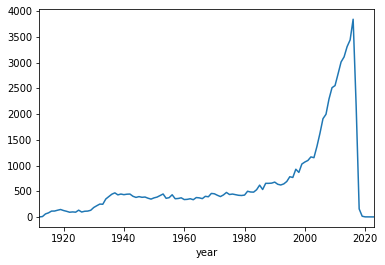

In [64]:
cg = c.groupby(['year']).size()
cg.plot()

In [65]:
c = casts
cf = c[c['name'] == 'Aaron Abrams']
cf.groupby(['year']).size().head()

year
2003    2
2004    2
       ..
2006    1
2007    2
Length: 5, dtype: int64

Hace un group by usando mas de una columna

In [66]:
cf.groupby(['year', 'title']).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
                                             ..
2004  Siblings                                1
2005  Cinderella Man                          1
Length: 5, dtype: int64

In [67]:
c.groupby(['year']).n.max().head()

year
1912     6.0
1913    14.0
        ... 
1915    14.0
1916    35.0
Name: n, Length: 5, dtype: float64

In [68]:
c.groupby(['year']).n.min().head()

year
1912    6.0
1913    1.0
       ... 
1915    1.0
1916    1.0
Name: n, Length: 5, dtype: float64

In [69]:
c.groupby(['year']).n.mean().head()

year
1912    6.000000
1913    4.142857
          ...   
1915    4.236111
1916    5.037736
Name: n, Length: 5, dtype: float64

Tambien podemos hacer un group by por un campo __custom__:

In [70]:
decade = c['year']//10*10
c_dec = c.groupby(decade).n.size()
c_dec.head()

year
1910     669
1920    1121
        ... 
1940    3997
1950    3892
Name: n, Length: 5, dtype: int64

In [71]:
c

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
...,...,...,...,...,...,...
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN
75000,Fugitive Pieces,2007,Anastassia Anastassopoulou,actress,Laundry Girl,25.0


In [72]:
cg1=c['name'].groupby(c['year'])
cg1

In [73]:
for ano,nombre in cg1:
    print(ano)
    print(nombre)

1912
21879    James D. Ainsley
63234          Rina Albry
69034          Gyda Aller
Name: name, dtype: object
1913
14100        Eric Adeney
17190    Svend Aggerholm
              ...       
44273       Carl Alstrup
57767    Ellen Aggerholm
Name: name, Length: 10, dtype: object
1914
55                   Paddy 'Malid
334                 Enoch Aagaard
                   ...           
69031                  Gyda Aller
70127    Italia Almirante-Manzini
Name: name, Length: 61, dtype: object
1915
1737     Charles S. Abbe
1738     Charles S. Abbe
              ...       
69387        May Allison
71030       Lottie Alter
Name: name, Length: 82, dtype: object
1916
4510     William L. Abingdon
7542        Fritz Achterberg
                ...         
71031           Lottie Alter
74930          Alice Anaroni
Name: name, Length: 116, dtype: object
1917
282                    Hauk Aabel
2014                  Jack Abbott
                   ...           
69384                 May Allison
70129    Ita

Name: name, Length: 679, dtype: object
1991
456      Risto Aaltonen
757      Reidar Aarsand
              ...      
74827      Sujata Anand
74833     Suparna Anand
Name: name, Length: 637, dtype: object
1992
51       Tony 'La Chispa'
342         Larry Aagesen
               ...       
74706              Anamia
74830       Suparna Anand
Name: name, Length: 623, dtype: object
1993
31           F?lix 'El Gato'
38       Van 'Igor' Morrison
                ...         
74815           Sujata Anand
74988          Zoe Anastasis
Name: name, Length: 644, dtype: object
1994
65       Chris 'Slick' Nesevitch
414               Preben Aalholt
                  ...           
74816               Sujata Anand
74826               Sujata Anand
Name: name, Length: 691, dtype: object
1995
52          Tony 'La Chispa'
181          Charles A'Lexis
                ...         
74620    Marinella Anaclerio
74928     Angeliki Anargyrou
Name: name, Length: 783, dtype: object
1996
44       N?stor 'Kick Boxer'
18

In [74]:
cg2=c['name'].groupby([c['type'],c['year']])

In [75]:
for (tipo,ano),nombre in cg2:
    print(ano)
    print(tipo)
    print(nombre)

1912
actor
21879    James D. Ainsley
Name: name, dtype: object
1913
actor
14100        Eric Adeney
17190    Svend Aggerholm
              ...       
44272       Carl Alstrup
44273       Carl Alstrup
Name: name, Length: 9, dtype: object
1914
actor
55        Paddy 'Malid
334      Enoch Aagaard
             ...      
49490      Gerald Ames
49492      Gerald Ames
Name: name, Length: 38, dtype: object
1915
actor
1737     Charles S. Abbe
1738     Charles S. Abbe
              ...       
49509        Gerald Ames
49512        Gerald Ames
Name: name, Length: 50, dtype: object
1916
actor
4510     William L. Abingdon
7542        Fritz Achterberg
                ...         
49504            Gerald Ames
49511            Gerald Ames
Name: name, Length: 57, dtype: object
1917
actor
282       Hauk Aabel
2014     Jack Abbott
            ...     
49474    Gerald Ames
49506    Gerald Ames
Name: name, Length: 58, dtype: object
1918
actor
335      Joakim Aagaard
526       Adolf Aanesen
              ...  

Name: name, Length: 305, dtype: object
1983
actor
125      4 Out of 5 Doctors
461          Risto Aaltonen
                ...        
49255         Don Amendolia
49699             Leon Ames
Name: name, Length: 315, dtype: object
1984
actor
71           Dick 't Hooft
182      Yussuf Abed A'Nur
               ...        
49158     Claudio Amendola
49192     Claudio Amendola
Name: name, Length: 345, dtype: object
1985
actor
1                 Homo $
452       Risto Aaltonen
              ...       
49225      Tony Amendola
49790    Hugues Amesland
Name: name, Length: 405, dtype: object
1986
actor
122       The 39 Steps
348             Aakash
             ...      
49680        Leon Ames
49907    Marvin Amiana
Name: name, Length: 341, dtype: object
1987
actor
178      Brett A'Hearn
610          Bob Aaron
             ...      
49949       Hank Amico
49950       Hank Amico
Name: name, Length: 400, dtype: object
1988
actor
210           Prasad A.
463      Risto Aaltonen
              ...     

Name: name, Length: 110, dtype: object
1942
actress
52942          Jean Acker
53315          Acquanetta
               ...       
73444           Jean Ames
73844    Marianne Aminoff
Name: name, Length: 99, dtype: object
1943
actress
53317          Acquanetta
53321          Acquanetta
               ...       
73594      Estela Ametler
74070    Consuelo del Amo
Name: name, Length: 100, dtype: object
1944
actress
50700    Miss Sarah Abbey
51838        Aurora Aboim
               ...       
73523         Ramsay Ames
73528         Ramsay Ames
Name: name, Length: 95, dtype: object
1945
actress
50117      Marlene Aames
50508    Leila Abashidze
              ...       
74177          Pita Amor
74556     Denise Amyenne
Name: name, Length: 98, dtype: object
1946
actress
50118     Marlene Aames
50845    Dorothy Abbott
              ...      
73619      Ebba Amfeldt
74837         Uma Anand
Name: name, Length: 98, dtype: object
1947
actress
50308           Ami Aar?e
50497     Leila Abashidze
     

# 4. Unstack

Hacemos el groupby por dos campos, uno de ellos custom

In [76]:
c = casts
c_decade = c.groupby( ['type', c['year']//10*10] ).size()
c_decade.head(8)

type   year
actor  1910     384
       1920     710
               ... 
       1970    3044
       1980    3565
Length: 8, dtype: int64

In [77]:
c_decade

type     year
actor    1910     384
         1920     710
                 ... 
actress  2010    8853
         2020       3
Length: 24, dtype: int64

__Bonito!__

In [78]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


In [79]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


Muestra un grafico de barras:

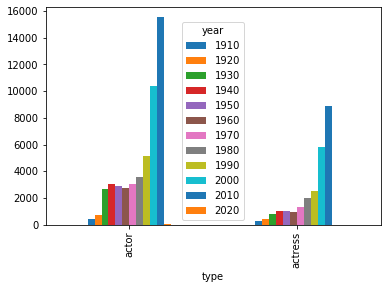

In [80]:
c_decade.unstack().plot(kind='bar')

Hacemos la transpuesta del Dataframe para representarlo

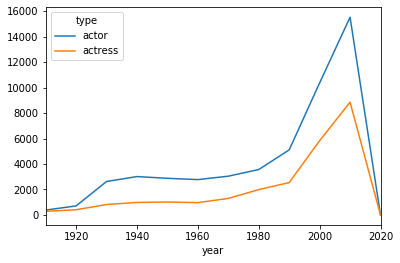

In [81]:
c_decade.unstack().T.plot()

Podemos especificar que variable desapilar. En nuestro dataframe tenemos type y actor

In [82]:
c_decade

type     year
actor    1910     384
         1920     710
                 ... 
actress  2010    8853
         2020       3
Length: 24, dtype: int64

Por defecto unstack() es equivalente a unstack(-1). En nuestro caso unstack(-1) es lo mismo que unstack(1)

In [83]:
c_decade.unstack(1)

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


In [84]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
...,...,...
2010,15523,8853
2020,4,3


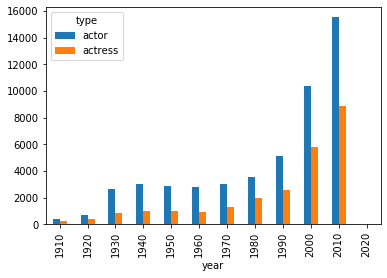

In [85]:
c_decade.unstack(0).plot(kind='bar')

# 5. Merge (joins)

In [86]:
release = pd.read_csv('./data/release_dates.csv', index_col=None)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
...,...,...,...,...
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [87]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
...,...,...,...,...,...,...
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [88]:
c_amelia = casts[ casts['title'] == 'Amelia']
c_amelia.head()

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [89]:
release [ release['title'] == 'Amelia' ].head()

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
...,...,...,...,...
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12


Hace el merge de los dos DataFrame usando los campos que son comunes en ambos:

In [90]:
c_amelia.merge(release).head()

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
...,...,...,...,...,...,...,...,...
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


## 5.1 Merge consigo mismo

In [91]:
c = casts[ casts['name']=='Aaron Abrams' ]
c.head(2)

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0


In [92]:
c.merge(casts, on=['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
...,...,...,...,...,...,...,...,...,...,...
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


## 5.2 Avanzado

In [93]:
df1 = pd.DataFrame({ 'key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
... 'data1' : range(7)})
df1

,key,data1
0,b,0
1,b,1
...,...,...
5,a,5
6,b,6


In [94]:
df2 = pd.DataFrame({ 'key' : ['a', 'b', 'd'],
... 'data2' : range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [95]:
df3 = pd.DataFrame({ 'key1' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
... 'data1' : range(7)})
df3

,key1,data1
0,b,0
1,b,1
...,...,...
5,a,5
6,b,6


In [96]:
df4 = pd.DataFrame({ 'key2' : ['a', 'b', 'd', 'b'],
... 'data1' : range(4)})
df4

,key2,data1
0,a,0
1,b,1
2,d,2
3,b,3


### 5.2.1 Many to One

Utiliza los campos que son comunes en ambos DataFrames para hacer el join:

In [97]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
...,...,...,...
4,a,4,0
5,a,5,0


Estos dos dataframes no tienen ningun campo comun. Tenemos que especificar al har el join que camnpos se deben utilizar

In [98]:
pd.merge(df3, df4, left_on='key1', right_on='key2')

,key1,data1_x,key2,data1_y
0,b,0,b,1
1,b,0,b,3
...,...,...,...,...
7,a,4,a,0
8,a,5,a,0


### 5.2.2 Inner and outer join

Un __left join__:

In [99]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="left")

,key1,data1_x,key2,data1_y
0,b,0,b,1.0
1,b,0,b,3.0
...,...,...,...,...
8,b,6,b,1.0
9,b,6,b,3.0


Un __right__ join: 

In [100]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="right")

,key1,data1_x,key2,data1_y
0,b,0.0,b,1
1,b,1.0,b,1
...,...,...,...,...
8,a,5.0,a,0
9,NaN,NaN,d,2


Un __outer__ join: 

In [101]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="outer")

,key1,data1_x,key2,data1_y
0,b,0.0,b,1.0
1,b,0.0,b,3.0
...,...,...,...,...
9,c,3.0,NaN,NaN
10,NaN,NaN,d,2.0


# 6. Indices

Medimos el tiempo que se necesita para hacer ciertas operaciones con y sin indice

Usamos la magic function __%%time__

In [102]:
interpretes=pd.read_csv('./data/cast.csv', index_col=None)

In [103]:
%%time

interpretes[interpretes['title']=='Macbeth']

Wall time: 11 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...,...
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


Usamos la magic function __%%timeit__. Es mas precisa que %%time

In [104]:
%%timeit

interpretes[interpretes['title']=='Macbeth']

8.53 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Fijamos una de las columnas como indice. Al hacerlo podremos buscar usando el indice. Notese que la Serie usada ya no figura en la relacion de columnas

In [105]:
c = interpretes.set_index('title')
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
...,...,...,...,...,...
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [106]:
c.columns

Index(['year', 'name', 'type', 'character', 'n'], dtype='object')

In [107]:
%%time

c.loc['Macbeth']

Wall time: 14 ms


,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [108]:
%%timeit

c.loc['Macbeth']

3.4 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Conclusion: __es mucho mas rápido__  
  
Vamos a ordenar el indice. Veamos cual es el resultado de la busqueda una vez hemos ordenado el indice

In [109]:
c = interpretes.set_index('title').sort_index()

In [110]:
%%time

c.loc['Macbeth']

Wall time: 19 ms


,year,name,type,character,n
title,,,,,
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,2015,Darren Adamson,actor,Soldier,NaN


In [111]:
%%timeit

c.loc['Macbeth']

300 µs ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Conclusion: el indice __ordenado__ es __extremadamente mas rápido__

## 6.1 Más de un indice

In [112]:
cm = interpretes.set_index(['title', 'n']).sort_index()
cm.head(2)

,,year,name,type,character
title,n,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter


In [113]:
cm.index

MultiIndex([(          '#1 Serial Killer', 17.0),
            (       '#DigitalLivesMatter',  nan),
            (             '#FromJennifer',  nan),
            (             '#FromJennifer',  nan),
            (                   '#Horror',  1.0),
            (             '#Lucky Number', 31.0),
            (        '#Nerealnaya lyubov',  nan),
            (              '#REALITYHIGH',  nan),
            (                     '#Roxy',  nan),
            (                    '#Stuck', 18.0),
            ...
            (                      'iBoy',  9.0),
            (               'inter.m@tes',  6.0),
            (           'kingdom of ants',  nan),
            (           'kingdom of ants',  nan),
            (  'les aventures d'archives',  nan),
            (                 'w Delta z',  8.0),
            ('xXx: Return of Xander Cage', 34.0),
            ('xXx: Return of Xander Cage', 64.0),
            ('xXx: Return of Xander Cage', 84.0),
            (   'xXx: State of the

Si ahora buscamos por uno de los dos indices, notese que el DataFrame resultante sigue teniendo un indice:

In [114]:
cm.loc['Macbeth']

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
...,...,...,...,...
NaN,2016,John Albasiny,actor,Doctor
NaN,2014,Moyo Akand?,actress,Witch


Podemos ahora hacer una busqueda __usando los dos__ indices:

In [115]:
cm.loc['Macbeth'].loc[4]

year                        1916
name         Spottiswoode Aitken
type                       actor
character                 Duncan
Name: 4.0, dtype: object

In [116]:
cm.loc['Macbeth',6]

C:\Users\Eugenio\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,year,name,type,character
title,n,,,,
Macbeth,6.0,1916,Mary Alden,actress,Lady Macduff


## 6.2 Eliminar un indice

In [117]:
cm = cm.reset_index('n')
cm.index

Index(['#1 Serial Killer', '#DigitalLivesMatter', '#FromJennifer',
       '#FromJennifer', '#Horror', '#Lucky Number', '#Nerealnaya lyubov',
       '#REALITYHIGH', '#Roxy', '#Stuck',
       ...
       'iBoy', 'inter.m@tes', 'kingdom of ants', 'kingdom of ants',
       'les aventures d'archives', 'w Delta z', 'xXx: Return of Xander Cage',
       'xXx: Return of Xander Cage', 'xXx: Return of Xander Cage',
       'xXx: State of the Union'],
      dtype='object', name='title', length=75001)

Una vez hemos eliminado el indice, la Serie vuelve a su sitio. Fijemo nos en la columna `n`:

In [118]:
cm.columns

Index(['n', 'year', 'name', 'type', 'character'], dtype='object')

In [119]:
cm = cm.reset_index('title')
cm.index

RangeIndex(start=0, stop=75001, step=1)

In [120]:
cm.columns

Index(['title', 'n', 'year', 'name', 'type', 'character'], dtype='object')

In [121]:
cm

,title,n,year,name,type,character
0,#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
1,#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter
...,...,...,...,...,...,...
74999,xXx: Return of Xander Cage,84.0,2017,Julie Abcede,actor,Catwalk Partiers
75000,xXx: State of the Union,NaN,2005,Robert Alonzo,actor,Guard


## 6.3 Finalmente  
Podemos crear una Serie o un DataStream a partir de una lista con datos, pero tambien podemos especificar una lista con los valores del indice

In [122]:
data = pd.Series([10, 20, 30, 40, 15, 25, 35, 25], index = ['a', 'a',
... 'a', 'a', 'b', 'b', 'b', 'b'])
data.head()

a    10
a    20
     ..
a    40
b    15
Length: 5, dtype: int64

Podriamos crea el indece multi-indice, si pasasemos dos listas:

In [123]:
data = pd.Series([10, 20, 30, 40, 15, 25, 35, 25], index = [['a', 'a',
... 'a', 'a', 'b', 'b', 'b', 'b'], ['obj1', 'obj2', 'obj3', 'obj4', 'obj1',
... 'obj2', 'obj3', 'obj4']])
data.head()

a  obj1    10
   obj2    20
           ..
   obj4    40
b  obj1    15
Length: 5, dtype: int64

Podriamos especificar el nombre de los indices si pasasemos un diccionario:

# 7. Numpy

## 7.1 Matrices  
Matriz de Rango 1

In [124]:
import numpy as np

In [125]:
d = np.array([1, 2, 3])
type(d)

numpy.ndarray

In [126]:
d

array([1, 2, 3])

In [127]:
d.shape

(3,)

Matriz de rango 2

In [128]:
nd = np.array([[1, 2, 3], [3, 4, 5], [10, 11, 12]])
type(nd)

numpy.ndarray

In [129]:
nd.shape

(3, 3)

In [130]:
nd.dtype

dtype('int32')

In [131]:
np.zeros(3)

array([0., 0., 0.])

In [132]:
np.ones(3)

array([1., 1., 1.])

In [133]:
uno=np.ones((3,3))

In [134]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [135]:
e2=uno+4
e2

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

Crea una matriz con unos con la misma shape que e2

In [136]:
np.ones_like(e2)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Convierte una lista en matriz

In [137]:
a = ['1', '2', '3']
a

['1', '2', '3']

In [138]:
a_arr = np.array(a, dtype=np.string_)
a_arr

array([b'1', b'2', b'3'], dtype='|S1')

## 7.2 Boolean indexing

In [139]:
data = np.random.randn(5, 3)
data.shape

(5, 3)

In [140]:
name = np.array(['a', 'b', 'c', 'a', 'b'])

Retorna una matriz booleana con el resultado de la comparacion:

In [141]:
name=='a'

array([ True, False, False,  True, False])

Este vector booleano lo podemos pasar como argumento de modo que aquellas filas que sean true seran recuperadas 

In [142]:
data

array([[-0.47923238,  0.41059499, -1.03345253],
       [-0.11551061,  0.49406744, -1.52228663],
       [-0.36982267, -0.06316375,  1.12379454],
       [ 0.59977342, -0.60288708,  1.50593362],
       [ 1.77710333,  0.84154486, -1.72795422]])

__Excelente!!!__. Podemos recuperar las filas que nos interese de nuestra matriz

In [143]:
data[name=='a']

array([[-0.47923238,  0.41059499, -1.03345253],
       [ 0.59977342, -0.60288708,  1.50593362]])

In [144]:
data[name != 'a']

array([[-0.11551061,  0.49406744, -1.52228663],
       [-0.36982267, -0.06316375,  1.12379454],
       [ 1.77710333,  0.84154486, -1.72795422]])

In [145]:
data[(name == 'b') | (name=='c')]

array([[-0.11551061,  0.49406744, -1.52228663],
       [-0.36982267, -0.06316375,  1.12379454],
       [ 1.77710333,  0.84154486, -1.72795422]])

Si le pasamos __una matriz booleana__ con la misma dimension que la propia matriz, aplica una especie de __mascara__, retornando aquellas celdas en las que el valor sea true

In [146]:
data[ (data > 1) & (data < 2) ]

array([1.12379454, 1.50593362, 1.77710333])

## 7.3 Reshape

In [147]:
a = np.arange(0, 20)
a.shape

(20,)

In [148]:
a45 = a.reshape(4, 5)
a45

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Recupera ciertas filas de la matriz

In [149]:
b = a45[ [2, 0, 1] ]
b

array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

Traspuesta

In [150]:
b.T

array([[10,  0,  5],
       [11,  1,  6],
       [12,  2,  7],
       [13,  3,  8],
       [14,  4,  9]])

## 7.4 Concatenating

Para muestras de la normal N(mu, sigma^2), usar:

sigma * np.random.randn(...) + mu

In [151]:
arr = np.arange(12).reshape(3,4)
rn = np.random.randn(3, 4)
rn.shape

(3, 4)

In [152]:
np.concatenate([arr, rn]).shape

(6, 4)

In [153]:
np.concatenate([arr, rn], axis=1).shape

(3, 8)

# 8. Time Series
## 8.1 Date Ranges

In [154]:
rng = pd.date_range('2011-03-01 10:15', periods = 10, freq = 'M')
rng

DatetimeIndex(['2011-03-31 10:15:00', '2011-04-30 10:15:00',
               '2011-05-31 10:15:00', '2011-06-30 10:15:00',
               '2011-07-31 10:15:00', '2011-08-31 10:15:00',
               '2011-09-30 10:15:00', '2011-10-31 10:15:00',
               '2011-11-30 10:15:00', '2011-12-31 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [155]:
rng = pd.date_range('2015 Jul 2 10:15', periods = 10, freq = 'M')
rng

DatetimeIndex(['2015-07-31 10:15:00', '2015-08-31 10:15:00',
               '2015-09-30 10:15:00', '2015-10-31 10:15:00',
               '2015-11-30 10:15:00', '2015-12-31 10:15:00',
               '2016-01-31 10:15:00', '2016-02-29 10:15:00',
               '2016-03-31 10:15:00', '2016-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [156]:
rng = pd.date_range(start = '2015 Jul 2 10:15', end = '2015 July 12', freq = '12H')
rng

DatetimeIndex(['2015-07-02 10:15:00', '2015-07-02 22:15:00',
               '2015-07-03 10:15:00', '2015-07-03 22:15:00',
               '2015-07-04 10:15:00', '2015-07-04 22:15:00',
               '2015-07-05 10:15:00', '2015-07-05 22:15:00',
               '2015-07-06 10:15:00', '2015-07-06 22:15:00',
               '2015-07-07 10:15:00', '2015-07-07 22:15:00',
               '2015-07-08 10:15:00', '2015-07-08 22:15:00',
               '2015-07-09 10:15:00', '2015-07-09 22:15:00',
               '2015-07-10 10:15:00', '2015-07-10 22:15:00',
               '2015-07-11 10:15:00', '2015-07-11 22:15:00'],
              dtype='datetime64[ns]', freq='12H')

In [157]:
rng = pd.date_range(start = '2015 Jul 2 10:15', end = '2015 July 12', freq = '12H', tz='Asia/Kolkata')
rng

DatetimeIndex(['2015-07-02 10:15:00+05:30', '2015-07-02 22:15:00+05:30',
               '2015-07-03 10:15:00+05:30', '2015-07-03 22:15:00+05:30',
               '2015-07-04 10:15:00+05:30', '2015-07-04 22:15:00+05:30',
               '2015-07-05 10:15:00+05:30', '2015-07-05 22:15:00+05:30',
               '2015-07-06 10:15:00+05:30', '2015-07-06 22:15:00+05:30',
               '2015-07-07 10:15:00+05:30', '2015-07-07 22:15:00+05:30',
               '2015-07-08 10:15:00+05:30', '2015-07-08 22:15:00+05:30',
               '2015-07-09 10:15:00+05:30', '2015-07-09 22:15:00+05:30',
               '2015-07-10 10:15:00+05:30', '2015-07-10 22:15:00+05:30',
               '2015-07-11 10:15:00+05:30', '2015-07-11 22:15:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq='12H')

In [158]:
type(rng[0])

pandas._libs.tslibs.timestamps.Timestamp

## 8.2 Convertir Strings a Fechas (timestamps)

In [159]:
dd = ['07/07/2015', '08/12/2015', '12/04/2015']
type(dd[0])

str

In [160]:
list(pd.to_datetime(dd))

[Timestamp('2015-07-07 00:00:00'),
 Timestamp('2015-08-12 00:00:00'),
 Timestamp('2015-12-04 00:00:00')]

### 8.2.1 Time offsets (timedelta)

In [161]:
pd.Timedelta('3 days')

Timedelta('3 days 00:00:00')

In [162]:
pd.Timedelta('3M')

Timedelta('0 days 00:03:00')

In [163]:
pd.Timedelta('4 days 3M')

Timedelta('4 days 00:03:00')

In [164]:
pd.Timestamp('9 July 2016 12:00') + pd.Timedelta('1 day 3 min')

Timestamp('2016-07-10 12:03:00')

In [165]:
rng + pd.Timedelta('1 day')

DatetimeIndex(['2015-07-03 10:15:00+05:30', '2015-07-03 22:15:00+05:30',
               '2015-07-04 10:15:00+05:30', '2015-07-04 22:15:00+05:30',
               '2015-07-05 10:15:00+05:30', '2015-07-05 22:15:00+05:30',
               '2015-07-06 10:15:00+05:30', '2015-07-06 22:15:00+05:30',
               '2015-07-07 10:15:00+05:30', '2015-07-07 22:15:00+05:30',
               '2015-07-08 10:15:00+05:30', '2015-07-08 22:15:00+05:30',
               '2015-07-09 10:15:00+05:30', '2015-07-09 22:15:00+05:30',
               '2015-07-10 10:15:00+05:30', '2015-07-10 22:15:00+05:30',
               '2015-07-11 10:15:00+05:30', '2015-07-11 22:15:00+05:30',
               '2015-07-12 10:15:00+05:30', '2015-07-12 22:15:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq='12H')

## 8.3 Periodo
### 8.3.1 Definición
Period y timestamp son parecidos, pero muy diferentes. Timestamp representa un instante de tiempo, mientras que Period representa un intervalo de tiempo. Contra un objeto Period podemos hacer muchas preguntas, como cual es el inicio o el fin, podemos comprobar si un determinado dia esta incluido, etc.

In [217]:
pr = pd.Period('2012', freq='M')
pr

Period('2012-01', 'M')

In [218]:
pr.dayofweek

1

In [219]:
pr.days_in_month

31

In [220]:
pr.quarter

1

In [221]:
pr.month

1

### 8.3.2 Convierte a otro Periodo
Veamos cual es el inicio y el fin del periodo en __D__ias

In [167]:
pr.asfreq('D', 'start')

Period('2012-01-01', 'D')

In [168]:
pr.asfreq('D', 'end')

Period('2012-01-31', 'D')

Es equivalente

In [222]:
pr.asfreq(freq='D', how='end')

Period('2012-01-31', 'D')

### 8.3.3 Aritmetica

In [169]:
pr = pd.Period('2012', freq='A')
pr

Period('2012', 'A-DEC')

In [170]:
pr+1

Period('2013', 'A-DEC')

Covierte a frecuencia mensual:

In [171]:
prMonth = pr.asfreq('M')
prMonth

Period('2012-12', 'M')

In [172]:
prMonth-1

Period('2012-11', 'M')

### 8.3.4 Convertir strings a Period

In [173]:
dates = ['2013-02-02', '2012-02-02', '2013-02-02']
d = pd.to_datetime(dates)

Crea un periodo mensual

In [174]:
prd = d.to_period(freq='M')
prd

PeriodIndex(['2013-02', '2012-02', '2013-02'], dtype='period[M]', freq='M')

In [175]:
prd.asfreq('D')

PeriodIndex(['2013-02-28', '2012-02-29', '2013-02-28'], dtype='period[D]', freq='D')

In [176]:
prd.asfreq('Y')

PeriodIndex(['2013', '2012', '2013'], dtype='period[A-DEC]', freq='A-DEC')

### 8.3.5 Rango

In [177]:
prg=pd.period_range('2010', '2015', freq='A')
prg

PeriodIndex(['2010', '2011', '2012', '2013', '2014', '2015'], dtype='period[A-DEC]', freq='A-DEC')

Crea una serie que utiliza un indice anual

In [178]:
data = pd.Series(np.random.rand(len(prg)), index=prg)
data

2010    0.752444
2011    0.959831
          ...   
2014    0.233064
2015    0.657164
Freq: A-DEC, Length: 6, dtype: float64

## 8.4 Crear indices con fechas

In [179]:
dates = pd.date_range('2015-01-12', '2015-06-14', freq = 'M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31'],
              dtype='datetime64[ns]', freq='M')

In [180]:
atemp = pd.Series([100.2, 98, 93, 98, 100], index=dates)

In [181]:
atemp.index[3]

Timestamp('2015-04-30 00:00:00', freq='M')

In [182]:
stemp = pd.Series([89, 98, 100, 88, 89], index=dates)

In [183]:
temps = pd.DataFrame({'Auckland':atemp, 'Delhi':stemp})

In [184]:
temps['Auckland']

2015-01-31    100.2
2015-02-28     98.0
              ...  
2015-04-30     98.0
2015-05-31    100.0
Freq: M, Name: Auckland, Length: 5, dtype: float64

In [185]:
temps['Diff'] = temps['Auckland'] - temps['Delhi']

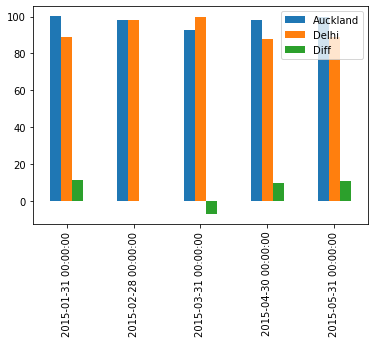

In [186]:
temps.plot(kind='bar')

In [187]:
del temps['Diff']

## 8.5 Aplicacion de Time Series

### 8.5.1 Operaciones Basicas

Si leemos el csv de forma "normal", la columna con las fecha no se reconocera como un timestamp

In [188]:
df = pd.read_csv('./Data/stocks.csv',delimiter=';')
df.head()

,date,AA,GE,IBM,MSFT
0,01/02/1990 0:00,4.98,2.87,16.79,0.51
1,02/02/1990 0:00,5.04,2.87,16.89,0.51
...,...,...,...,...,...
3,06/02/1990 0:00,5.01,2.88,17.56,0.51
4,07/02/1990 0:00,5.04,2.91,17.93,0.51


Veamos que efectivamente la columna date no es una fecha

In [189]:
df.date[0]

'01/02/1990 0:00'

In [190]:
df['date'].dtype

dtype('O')

In [191]:
pd.to_datetime(df.date[0])

Timestamp('1990-01-02 00:00:00')

Podriamos convertir el string a fecha:

In [192]:
df.date=pd.to_datetime(df.date)

In [193]:
df.date[0]

Timestamp('1990-01-02 00:00:00')

In [194]:
df['date'].dtype

dtype('<M8[ns]')

In [195]:
df.head()

,date,AA,GE,IBM,MSFT
0,1990-01-02,4.98,2.87,16.79,0.51
1,1990-02-02,5.04,2.87,16.89,0.51
...,...,...,...,...,...
3,1990-06-02,5.01,2.88,17.56,0.51
4,1990-07-02,5.04,2.91,17.93,0.51


Pero lo __mas practico y efectivo__ es que al leer el archivo especifiquemos que la informacion en la columna dates tiene que ser convertida a date

In [196]:
df = pd.read_csv('./data/stocks.csv', parse_dates=['date'],delimiter=';')

In [197]:
df.dtypes

date    datetime64[ns]
AA             float64
             ...      
IBM            float64
MSFT           float64
Length: 5, dtype: object

Podemos crear el indice al tiempo de leer:

In [198]:
df = pd.read_csv('./data/stocks.csv', parse_dates=['date'],delimiter=';',index_col='date')

In [199]:
df.head()

,AA,GE,IBM,MSFT
date,,,,
1990-01-02,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
...,...,...,...,...
1990-06-02,5.01,2.88,17.56,0.51
1990-07-02,5.04,2.91,17.93,0.51


In [200]:
df.index.name

'date'

In [201]:
stocks=df.copy()

Podemos usar el indice para recuperar por fecha. Todos los que siguen son equivalentes:

In [202]:
stocks.loc['1990-Feb-02']

,AA,GE,IBM,MSFT
date,,,,
1990-02-02,5.04,2.87,16.89,0.51


In [203]:
stocks.loc['1990/02/02']

,AA,GE,IBM,MSFT
date,,,,
1990-02-02,5.04,2.87,16.89,0.51


In [204]:
stocks.loc['1990, 02, 02']

,AA,GE,IBM,MSFT
date,,,,
1990-02-02,5.04,2.87,16.89,0.51


Podemos especificar solo hasta el mes, y recuperara los datos para todos los dias del mes

In [205]:
stocks.loc['1990/02']

,AA,GE,IBM,MSFT
date,,,,
1990-02-02,5.04,2.87,16.89,0.51
1990-02-13,4.91,2.88,17.95,0.52
...,...,...,...,...
1990-02-10,5.20,2.65,19.25,0.72
1990-02-11,4.52,2.52,19.27,0.71


Un rango

In [206]:
stocks.loc['1990-Feb-01':'1990-Feb-06']

,AA,GE,IBM,MSFT
date,,,,
1990-02-02,5.04,2.87,16.89,0.51
1990-02-03,5.41,2.92,18.23,0.57
1990-02-04,5.18,2.99,18.41,0.61
1990-02-05,5.09,3.03,18.97,0.64


In [207]:
from datetime import datetime, timedelta
start = datetime(1990, 2, 1)
start

datetime.datetime(1990, 2, 1, 0, 0)

In [208]:
start+pd.offsets.Day(5)

Timestamp('1990-02-06 00:00:00')

In [210]:
stocks.sort_index()

,AA,GE,IBM,MSFT
date,,,,
1990-01-02,4.98,2.87,16.79,0.51
1990-01-03,5.26,2.88,18.08,0.55
...,...,...,...,...
2011-12-09,11.55,14.87,162.42,25.89
2011-12-10,10.05,16.40,186.12,26.96


In [223]:
start+pd.offsets.Day(5)

Timestamp('1990-02-06 00:00:00')

### 8.5.2 Sampling

Sampling consiste en cambiar la frecuencia de una Time Series. Puede ser __downsampling__, cuando bajamos la frecuencia, o __upsampling__, cuando la subimos

In [227]:
stocks.loc[pd.date_range(stocks.index[0], stocks.index[-1], freq='M')].head()

C:\Users\Eugenio\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,AA,GE,IBM,MSFT
1990-01-31,NaN,NaN,NaN,NaN
1990-02-28,5.22,2.89,18.06,0.54
...,...,...,...,...
1990-04-30,5.07,2.99,18.95,0.63
1990-05-31,5.39,3.24,21.10,0.80


In [234]:
stocks.loc[pd.date_range(stocks.index[0], stocks.index[-1], freq='W')].head()

C:\Users\Eugenio\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,AA,GE,IBM,MSFT
1990-01-07,NaN,NaN,NaN,NaN
1990-01-14,NaN,NaN,NaN,NaN
...,...,...,...,...
1990-01-28,NaN,NaN,NaN,NaN
1990-02-04,5.18,2.99,18.41,0.61


#### Downsampling

In [233]:
stocks.resample('W').mean().head()

,AA,GE,IBM,MSFT
date,,,,
1990-01-07,5.192500,3.007500,18.665000,0.625000
1990-01-14,5.106667,2.850000,19.356667,0.716667
...,...,...,...,...
1990-01-28,NaN,NaN,NaN,NaN
1990-02-04,5.210000,2.926667,17.843333,0.563333


#### Upsampling
En este caso van a aparecer NaN. Podemos rellenarlas usando el metodo forward fill

In [238]:
rs = stocks.resample('B').asfreq()
rs

,AA,GE,IBM,MSFT
date,,,,
1990-01-02,4.98,2.87,16.79,0.51
1990-01-03,5.26,2.88,18.08,0.55
...,...,...,...,...
2011-12-08,12.26,15.73,168.20,24.94
2011-12-09,11.55,14.87,162.42,25.89


In [239]:
rs = stocks.resample('B').asfreq().fillna(method='ffill')
rs

,AA,GE,IBM,MSFT
date,,,,
1990-01-02,4.98,2.87,16.79,0.51
1990-01-03,5.26,2.88,18.08,0.55
...,...,...,...,...
2011-12-08,12.26,15.73,168.20,24.94
2011-12-09,11.55,14.87,162.42,25.89


### 8.5.3 Graficos

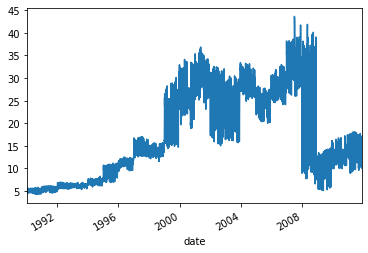

In [240]:
stocks.AA.plot()

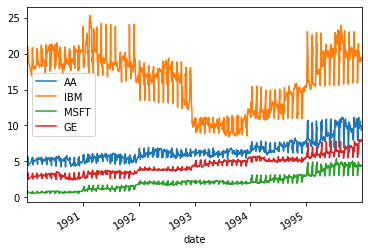

In [241]:
stocks.loc['1990':'1995', ['AA', 'IBM', 'MSFT', 'GE']].plot()

#### Rolling Windows

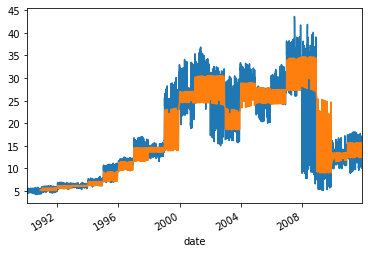

In [244]:
stocks.AA.plot()
stocks.AA.rolling(window=200,center=False).mean().plot()

# 9. Leer Varios Archivos

In [248]:
names1880 = pd.read_csv('./data/names/yob1880.txt', names=['name', 'gender', 'birthcount'])
len(names1880)

2000

In [250]:
names1880.head()

,name,gender,birthcount
0,Mary,F,7065
1,Anna,F,2604
...,...,...,...
3,Elizabeth,F,1939
4,Minnie,F,1746


In [251]:
names1880.groupby('gender').birthcount.sum()

gender
F     90993
M    110493
Name: birthcount, dtype: int64

## 9.1 Pivot Table

In [254]:
years = range(1880, 1887)
pieces = []
columns = ['name', 'gender', 'birthcount']
for year in years:
    path = './data/names/yob{}.txt'.format(year)
    columns = ['name', 'gender', 'birthcount']
    for year in years:
        path = './data/names/yob{}.txt'.format(year)
        df = pd.read_csv(path, names=columns)
        df['year']=year
        pieces.append(df)
        allData = pd.concat(pieces, ignore_index=True)

len(allData)

105903

In [255]:
allData.head(2)

,name,gender,birthcount,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


In [256]:
total_births = allData.pivot_table('birthcount', index=['year'], columns=['gender'], aggfunc=sum)
total_births.head(3)

gender,F,M
year,,
1880,636951,773451
1881,643685,705236
1882,754957,795809


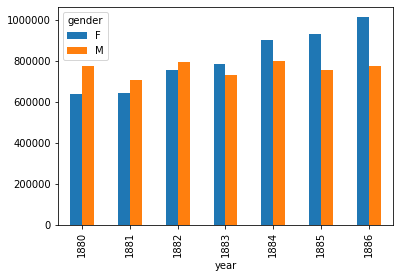

In [257]:
total_births.plot(kind='bar')

In [260]:
allData.groupby(['year', 'gender']).sum().unstack('gender').head(3)

birthcount        
gender          F       M
year                     
1880       636951  773451
1881       643685  705236
1882       754957  795809

In [267]:
def add_prop(group):
    births = group.birthcount.astype(float)
    group['prop'] = births/births.sum() # add column prop
    return group

In [268]:
names = allData.groupby(['year', 'gender']).apply(add_prop)
names.head()

,name,gender,birthcount,year,prop
0,Mary,F,7065,1880,0.011092
1,Anna,F,2604,1880,0.004088
...,...,...,...,...,...
3,Elizabeth,F,1939,1880,0.003044
4,Minnie,F,1746,1880,0.002741


## 9.2 Crosstab

Busca correlaciones

In [277]:
pd.crosstab(allData["birthcount"],allData["year"],margins=True)

year,1880,1881,1882,1883,1884,1885,1886,All
birthcount,,,,,,,,
5,1799,1687,1946,1918,2128,2191,2289,13958
6,1386,1225,1407,1372,1519,1582,1603,10094
...,...,...,...,...,...,...,...,...
9891,0,0,0,0,0,0,7,7
All,14000,13545,14889,14588,16079,16058,16744,105903


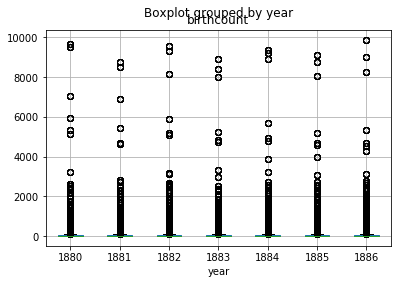

In [278]:
allData.boxplot(column="birthcount",by="year")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229F18BF0C8>,
      dtype=object)

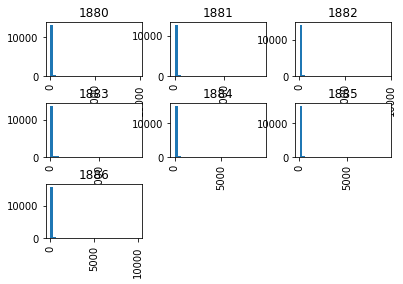

In [279]:
allData.hist(column="birthcount",by="year",bins=30)